<a href="https://colab.research.google.com/github/hopesofbuzzy/URFU_adii/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B8/6/fashion_mnist_dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание предметов одежды с помощью Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://www.asozykin.ru/courses/nnpython)".

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np

# Keras и Tensofrlow - библиотеки для машинного обучения
import matplotlib.pyplot as plt
%matplotlib inline

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [ ]:
# В Keras встроены средства работы с популярными наборами данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Список с названиями классов

In [ ]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

In [ ]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

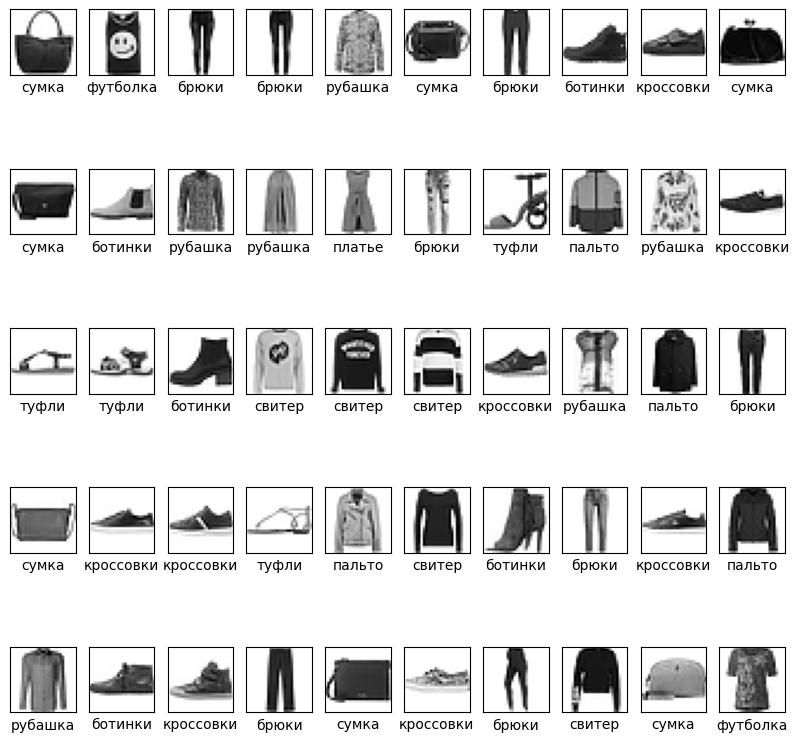

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [ ]:
x_train = x_train.reshape(60000, 784)

**Нормализация данных**

In [ ]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255

**Работа с правильными ответами**

Просматриваем пример правильного ответа

In [ ]:
print(y_train[0])

9


**Преобразуем метки в формат one hot encoding**

In [ ]:
y_train = utils.to_categorical(y_train, 10)

**Правильный ответ в формате one hot encoding**

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Описываем архитектуру нейронной сети**

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [ ]:
model.fit(x_train, y_train,
          batch_size=200,
          epochs=100,
          verbose=1)

Epoch 1/100
300/300 [==============================] - 4s 4ms/step - loss: 1.1186 - accuracy: 0.6718
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: 0.7246 - accuracy: 0.7748
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6354 - accuracy: 0.8006
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5860 - accuracy: 0.8134
Epoch 5/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5541 - accuracy: 0.8208
Epoch 6/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5313 - accuracy: 0.8259
Epoch 7/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5134 - accuracy: 0.8306
Epoch 8/100
300/300 [==============================] - 1s 4ms/step - loss: 0.4993 - accuracy: 0.8349
Epoch 9/100
300/300 [==============================] - 1s 4ms/step - loss: 0.4874 - accuracy: 0.8365
Epoch 10/100
300/300 [==============================] - 1s 4ms/step - loss: 0.4780 - accura

## Используем сеть для распознавания моделей одежды

**Запускаем распознавание набора данных, на котором обучалась сеть**

In [ ]:
predictions = model.predict(x_train)

**Проверяем качество распознавания**

Просматриваем пример изображения

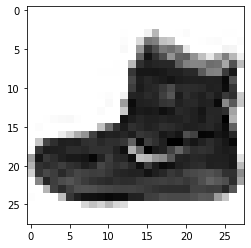

In [ ]:
# Меняйте значение n чтобы просмотреть результаты распознавания других изображений
n = 0
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

Данные на выходе из сети в формате one-hot-encoding

TODO: сделать подгрузку изображения извне для тестирования

In [ ]:
print(predictions[n])

[8.2510185e-09 3.9156992e-10 3.5070521e-10 7.8089091e-10 3.6004785e-10
 1.6781718e-04 3.6930359e-08 7.5175450e-04 3.9028450e-06 9.9907649e-01]


Определяем номер класса изображения, который предлагает сеть

In [ ]:
np.argmax(predictions[n])

9

Печатаем название класса

In [ ]:
classes[np.argmax(predictions[n])]

'ботинки'

Печатаем номер класса правильного ответа

In [ ]:
np.argmax(y_train[n])

9

Печатаем название класса правильного ответа

In [ ]:
classes[np.argmax(y_train[n])]

'ботинки'